In [1]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("dadosclientes.csv")
df.head()

,clientes,Valor_compra,qtde_produtos,forma_pag
0,cliente 2,378,10,1
1,cliente 5,475,18,1
2,cliente 1,285,10,1
3,cliente 1,181,4,0
4,cliente 7,177,20,1


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.30      1.00      0.46        18

    accuracy                           0.30        60
   macro avg       0.15      0.50      0.23        60
weighted avg       0.09      0.30      0.14        60



C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

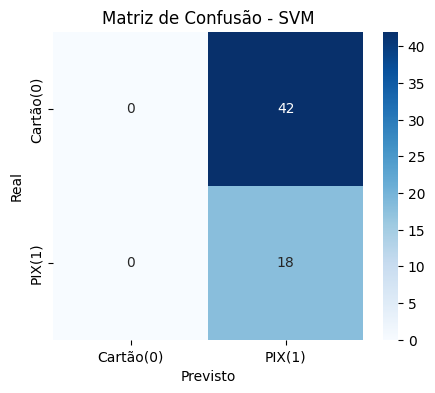

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar features e target
X = df[['Valor_compra', 'qtde_produtos']]
y = df['forma_pag']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Fazer previsões
y_pred = svm_model.predict(X_test)

# Relatório de métricas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cartão(0)', 'PIX(1)'], yticklabels=['Cartão(0)', 'PIX(1)'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()